In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import random

def convert_img(input_file, output_file, n= 5000):

    ubyte_f = open(input_file, 'rb')  # Open the binary file in read mode
    csv_f = open(output_file, 'w')  # Open a CSV file in write mode

    ubyte_f.read(16)  # Skip header (16 bytes)

    images = []

    for i in range(n):
        image = []
        for j in range(28 * 28):
            image.append(ord(ubyte_f.read(1)))  # Read pixel values
        images.append(image)  # Append image to images list

    for image in images:
        csv_f.write(",".join(str(pix) for pix in image) + "\n")

    print("Num of images in the csv= ", len(images))
    ubyte_f.close()
    csv_f.close()

def convert_label(input_file, output_file, n=5000):

    ubyte_f = open(input_file, 'rb')  # Open the binary file in read mode
    csv_f = open(output_file, 'w')  # Open a CSV file in write mode

    ubyte_f.read(8)  # Skip header (8 bytes)

    cnt_lbl = 0

    for i in range(n):
        ohe_label = [0 for _ in range(10)]  # One hot encoding of the labels
        ohe_label[(ord(ubyte_f.read(1)))] = 1
        csv_f.write((",".join(str(x) for x in ohe_label)) + "\n")
        cnt_lbl += 1

    print("Num of labels in the csv= ", cnt_lbl)
    ubyte_f.close()
    csv_f.close()

# Load the CSV data
x_train = np.loadtxt('/content/drive/MyDrive/IvLabs VNIT/MNIST Task Dataset/x_train.csv', delimiter=',').T
y_train = np.loadtxt('/content/drive/MyDrive/IvLabs VNIT/MNIST Task Dataset/y_train.csv', delimiter=',').T
x_test = np.loadtxt('/content/drive/MyDrive/IvLabs VNIT/MNIST Task Dataset/x_test.csv', delimiter=',').T
y_test = np.loadtxt('/content/drive/MyDrive/IvLabs VNIT/MNIST Task Dataset/y_test.csv', delimiter=',').T

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)


x_train size:  (784, 60000)
y_train size:  (10, 60000)
x_test size:  (784, 10000)
y_test size:  (10, 10000)


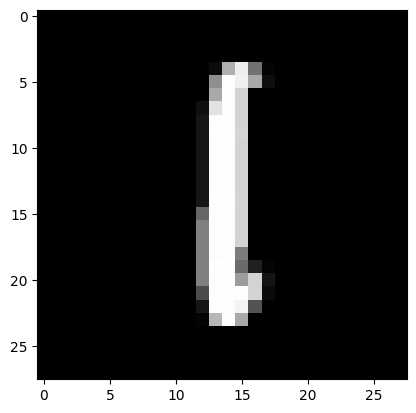

In [ ]:
# Random image display
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:, index].reshape(28, 28), cmap='gray')
plt.show()

In [ ]:
# Activation functions and derivatives
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x - np.max(x, axis=0, keepdims=True))
    return expX / np.sum(expX, axis=0, keepdims=True)

def derivative_tanh(x):
    return 1 - np.power(x, 2)

def derivative_relu(x):
    return np.array(x > 0, dtype=np.float32)


In [ ]:
def init_parameters(n0, n1, n2):
    w1 = np.random.randn(n1, n0) * 0.01
    b1 = np.zeros((n1, 1))

    w2 = np.random.randn(n2, n1) * 0.01
    b2 = np.zeros((n2, 1))

    return {'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}

def forward_prop(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2, a1) + b2
    y_hat = softmax(z2)

    return {'z1': z1, 'a1': a1, 'z2': z2, 'y_hat': y_hat}

def cost_func(y_hat, y):
    m = y.shape[1]
    cost = -(1 / m) * np.sum(y * np.log(y_hat + 1e-9))  # Add small epsilon for numerical stability
    return cost

def back_prop(x, y, forward_res, parameters):
    w1 = parameters['w1']
    w2 = parameters['w2']
    a1 = forward_res['a1']
    a2 = forward_res['y_hat']
    m = x.shape[1]

    dz2 = a2 - y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(w2.T, dz2) * derivative_tanh(a1)
    dw1 = (1 / m) * np.dot(dz1, x.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

    return {'dw1': dw1, 'db1': db1, 'dw2': dw2, 'db2': db2}

def update_parameters(parameters, gradients, learn_rate):
    parameters['w1'] -= learn_rate * gradients['dw1']
    parameters['b1'] -= learn_rate * gradients['db1']
    parameters['w2'] -= learn_rate * gradients['dw2']
    parameters['b2'] -= learn_rate * gradients['db2']
    return parameters

def accuracy(inp, labels, parameters):
    forward_res = forward_prop(inp, parameters)
    a_out = np.argmax(forward_res['y_hat'], axis=0)
    y_out = np.argmax(labels, axis=0)
    acc = np.mean(a_out == y_out) * 100
    return acc



Epoch: 1
Cost after epoch 1: 1.2306544805295672
Testset accuracy after epoch 1: 88.67
Trainset accuracy after epoch 1: 87.92666666666666

Epoch: 2
Cost after epoch 2: 0.509967202778759
Testset accuracy after epoch 2: 91.01
Trainset accuracy after epoch 2: 90.55666666666666

Epoch: 3
Cost after epoch 3: 0.37811233313286663
Testset accuracy after epoch 3: 91.86999999999999
Trainset accuracy after epoch 3: 91.71333333333334

Epoch: 4
Cost after epoch 4: 0.3226752577192689
Testset accuracy after epoch 4: 92.42
Trainset accuracy after epoch 4: 92.32333333333334

Epoch: 5
Cost after epoch 5: 0.290429205155139
Testset accuracy after epoch 5: 92.78999999999999
Trainset accuracy after epoch 5: 92.92666666666666

Epoch: 6
Cost after epoch 6: 0.26746210737207976
Testset accuracy after epoch 6: 93.16
Trainset accuracy after epoch 6: 93.32666666666667

Epoch: 7
Cost after epoch 7: 0.2500973782442447
Testset accuracy after epoch 7: 93.4
Trainset accuracy after epoch 7: 93.76166666666667

Epoch: 8
C

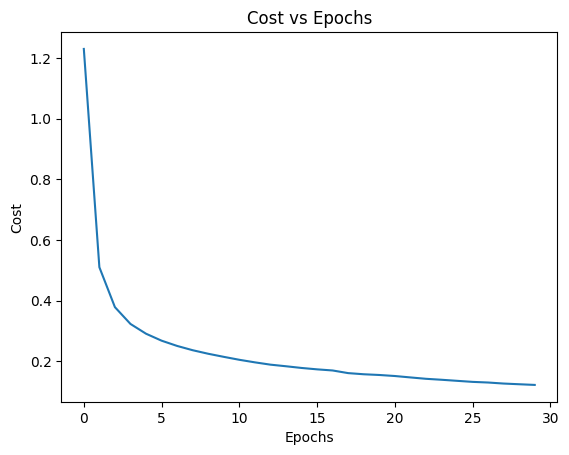

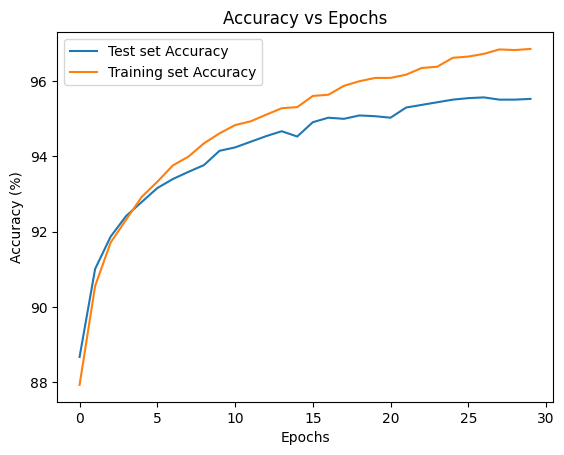

In [ ]:
# Training process
def NeuralNetwork(x, y, n1, learn_rate, epochs, batch_size):
    n0 = x.shape[0]
    n2 = y.shape[0]
    cost_list = []
    acc_list_test = []
    acc_list_train = []

    parameters = init_parameters(n0, n1, n2)

    for i in range(epochs):
        print(f"\nEpoch: {i+1}")
        cost_list_batch = []

        for j in range(x.shape[1] // batch_size):
            x_batch = x[:, j * batch_size:(j + 1) * batch_size]
            y_batch = y[:, j * batch_size:(j + 1) * batch_size]

            forward_res = forward_prop(x_batch, parameters)
            cost_batch = cost_func(forward_res['y_hat'], y_batch)
            cost_list_batch.append(cost_batch)

            gradients = back_prop(x_batch, y_batch, forward_res, parameters)
            parameters = update_parameters(parameters, gradients, learn_rate)

        cost_epoch = np.mean(cost_list_batch)
        print(f"Cost after epoch {i+1}: {cost_epoch}")
        cost_list.append(cost_epoch)

        acc = accuracy(x_test, y_test, parameters)
        print(f"Testset accuracy after epoch {i+1}: {acc}")
        acc_list_test.append(acc)

        acc = accuracy(x_train, y_train, parameters)
        print(f"Trainset accuracy after epoch {i+1}: {acc}")
        acc_list_train.append(acc)

    return parameters, cost_list, acc_list_test, acc_list_train

# Hyperparameters
epochs = 30
n1 = 128 # number of nodes in 1st hidden layer
learn_rate = 0.01
batch_size = 512

# Training the neural network
parameters, cost_list, acc_list_test, acc_list_train = NeuralNetwork(x_train, y_train, n1, learn_rate, epochs, batch_size)

# Plot cost and accuracy
t = np.arange(0, epochs)
plt.plot(t, cost_list)
plt.title('Cost vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

plt.plot(t, acc_list_test, label='Test set Accuracy')
plt.plot(t, acc_list_train, label='Training set Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.show()